# Data preparation

In this notebook, we will prepare the data for training our face recogntion model.

We split data into 2 set.
* training set: first 600 images
* Validation set: last 400 images

 ## Loading packages

In [8]:
! pwd

/Users/enzoliu/cnn_face_recogntion


In [76]:
import sys
import numpy as np

import matplotlib.pyplot as plt 
from skimage import io, util, color, transform

from statistics import mode
import random

sys.path.append('./src/')
import data_utils
import img_plot

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generating the data

### Generating the postive data

We crop the face in the training set, and save them.

In [11]:
label = np.loadtxt('./data/project_train/label.txt')

In [12]:
# get orginal images
img_raw = []
n_total = 1000
for i in range(n_total):
    im = color.rgb2gray(io.imread("./data/project_train/train/" + "%04d"%(i+1) + ".jpg"))
    im = util.img_as_float(im)
    img_raw.append(im)

In [13]:
# get face images
img_target = []
img_train = []
img_validation = []
for img in label:
    idx = int(img[0])
    o_h = int(img[1])
    o_l = int(img[2])
    h = int(img[3])
    l = int(img[4])
    sub_img = img_raw[idx-1][o_h :o_h + h, o_l : o_l + l]
    img_target.append(sub_img)
    if idx < 600:
        img_train.append(sub_img)
    else:
        img_validation.append(sub_img)

In [14]:
mean_hl = np.mean(label[:,3]/label[:,4])
mean_hl

1.519537040270022

In [15]:
ratio_HL = 1.5

In [16]:
# create detector box with fixed size
l_fixed = int(mode(label[:,4]))+1
h_fixed = int(ratio_HL * l_fixed)
print('{}, {}'.format(l_fixed, h_fixed))

80, 120


In [17]:
data_train_pos = []

for img in img_train:
    im = transform.resize(img,(h_fixed,l_fixed))
    data_train_pos.append(im)

In [18]:
data_train_pos = np.array(data_train_pos)
data_train_pos.shape

(771, 120, 80)

In [20]:
np.save('./data/output/data_set/data_train_pos', data_train_pos)

In [83]:
data_validation_pos = []

for img in img_validation:
    im = transform.resize(img,(h_fixed,l_fixed))
    data_validation_pos.append(im)

In [84]:
data_validation_pos = np.array(data_validation_pos)
data_validation_pos.shape

(513, 120, 80)

In [ ]:
np.save('./data/output/data_set/data_validation_pos', data_validation_pos)

### Generating the negative data

We crop image randomly with the size of the detector box. If the cover area between the cropped image and one of the face images > 0.1 (the status of being completely covered represent by 1), then the cropped image isn't a negative example.

In [24]:
data_train_neg = data_utils.generate_neg_data(img_raw, label, 0, 600, h_fixed, l_fixed, ratio_HL)

In [26]:
data_train_neg.shape

(3000, 120, 80)

In [27]:
np.save('./data/output/data_set/data_train_neg', data_train_neg)

In [77]:
data_validation_neg = data_utils.generate_neg_data(img_raw, label, 600, 1000, h_fixed, l_fixed, ratio_HL)

In [81]:
data_validation_neg.shape

(2000, 120, 80)

In [82]:
np.save('./data/output/data_set/data_validation_neg', data_validation_neg)

## Validation of the data

### Training set

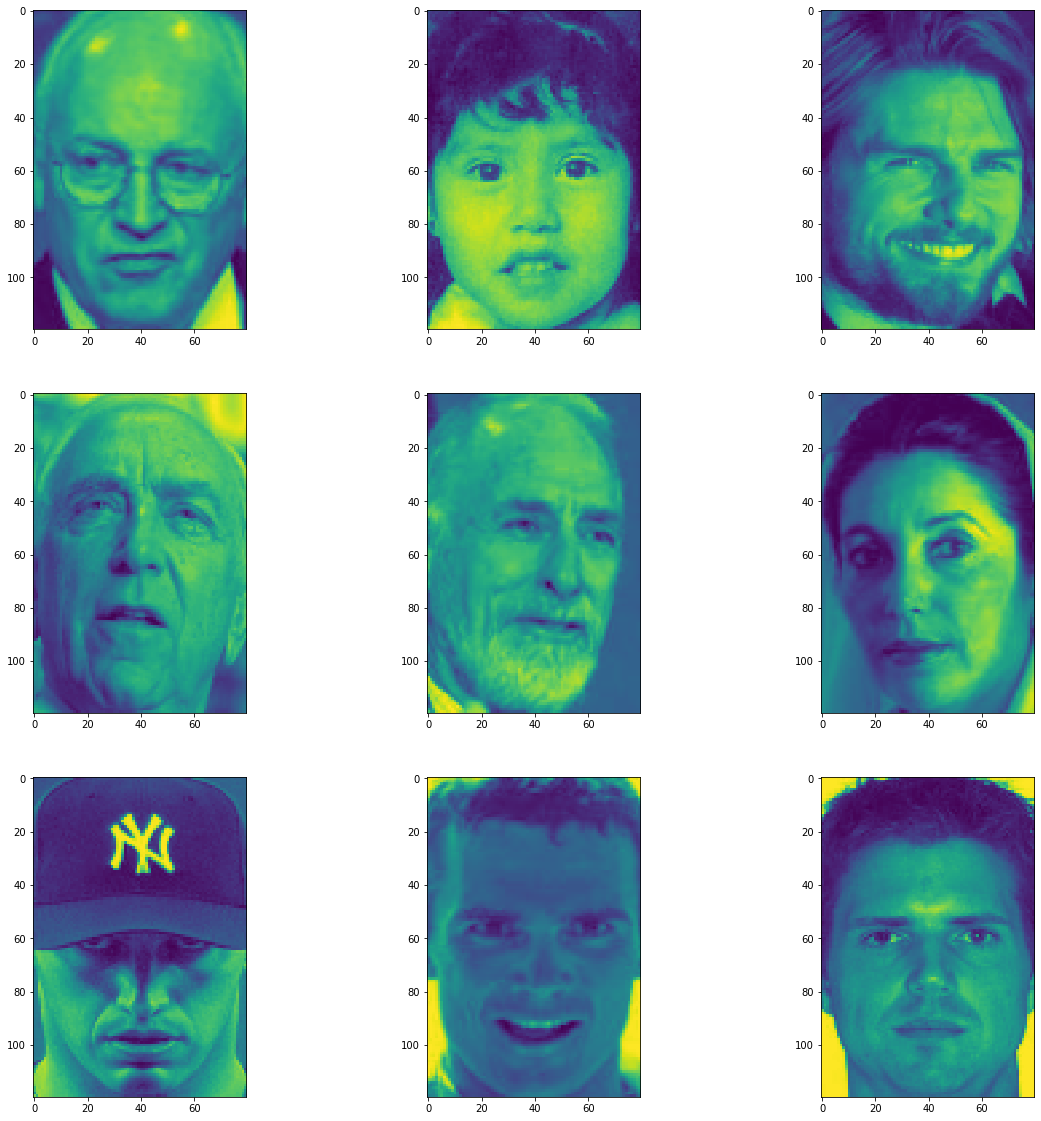

In [68]:
img_plot.plot_images_in_square(data_train_pos, 3, 20)

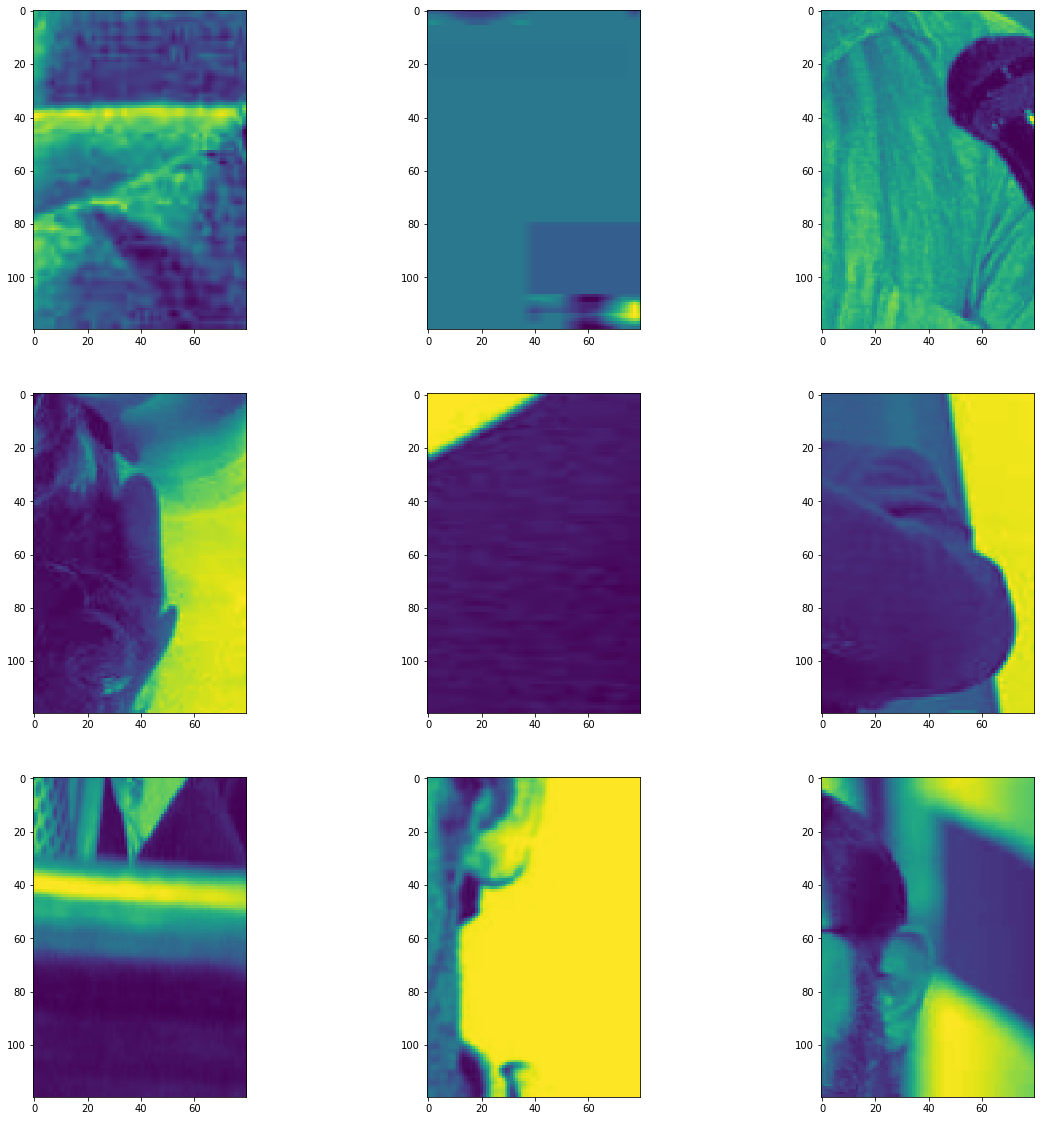

In [69]:
img_plot.plot_images_in_square(data_train_neg, 3, 20)

### Validation set

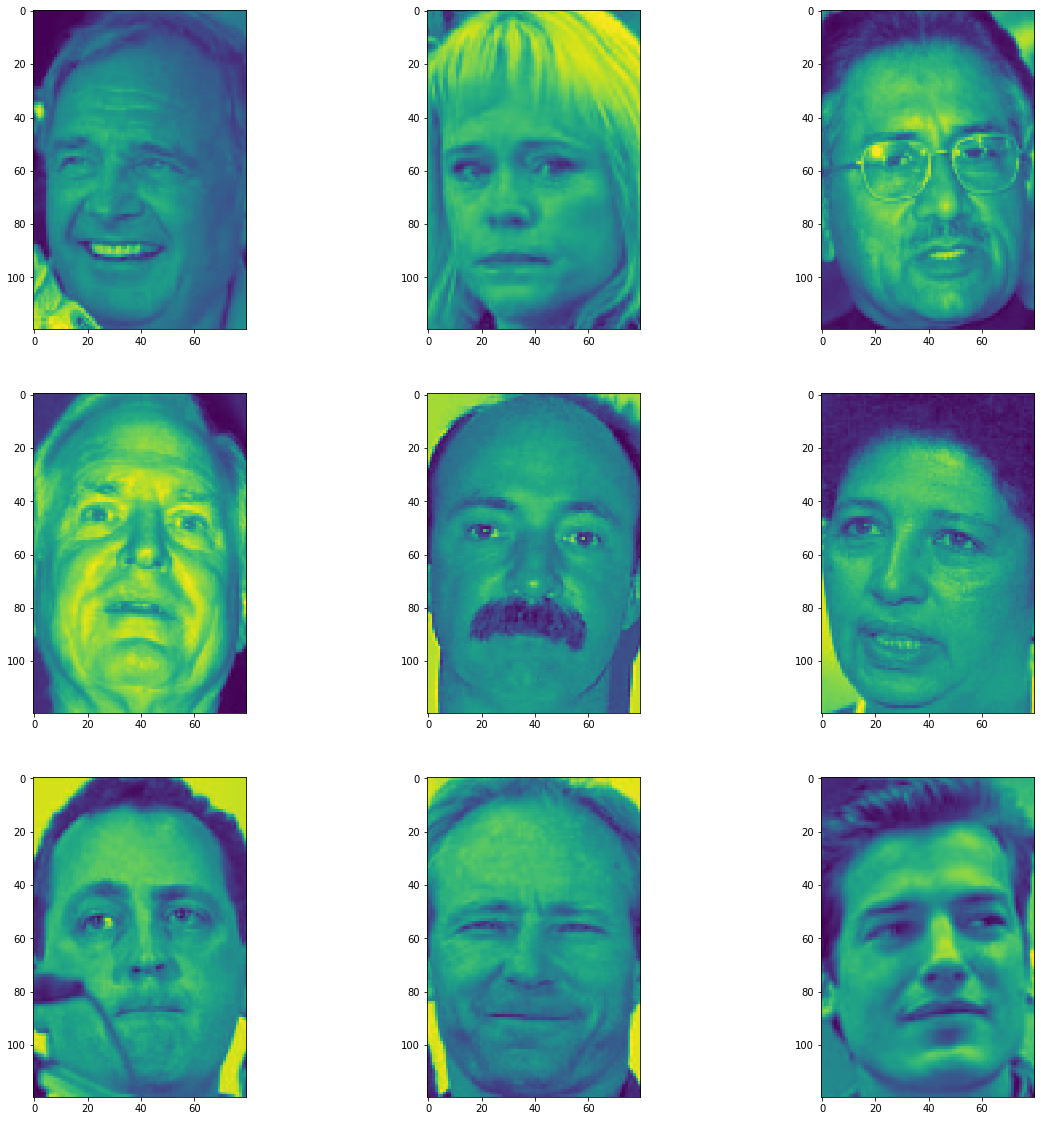

In [79]:
img_plot.plot_images_in_square(data_validation_pos, 3, 20)

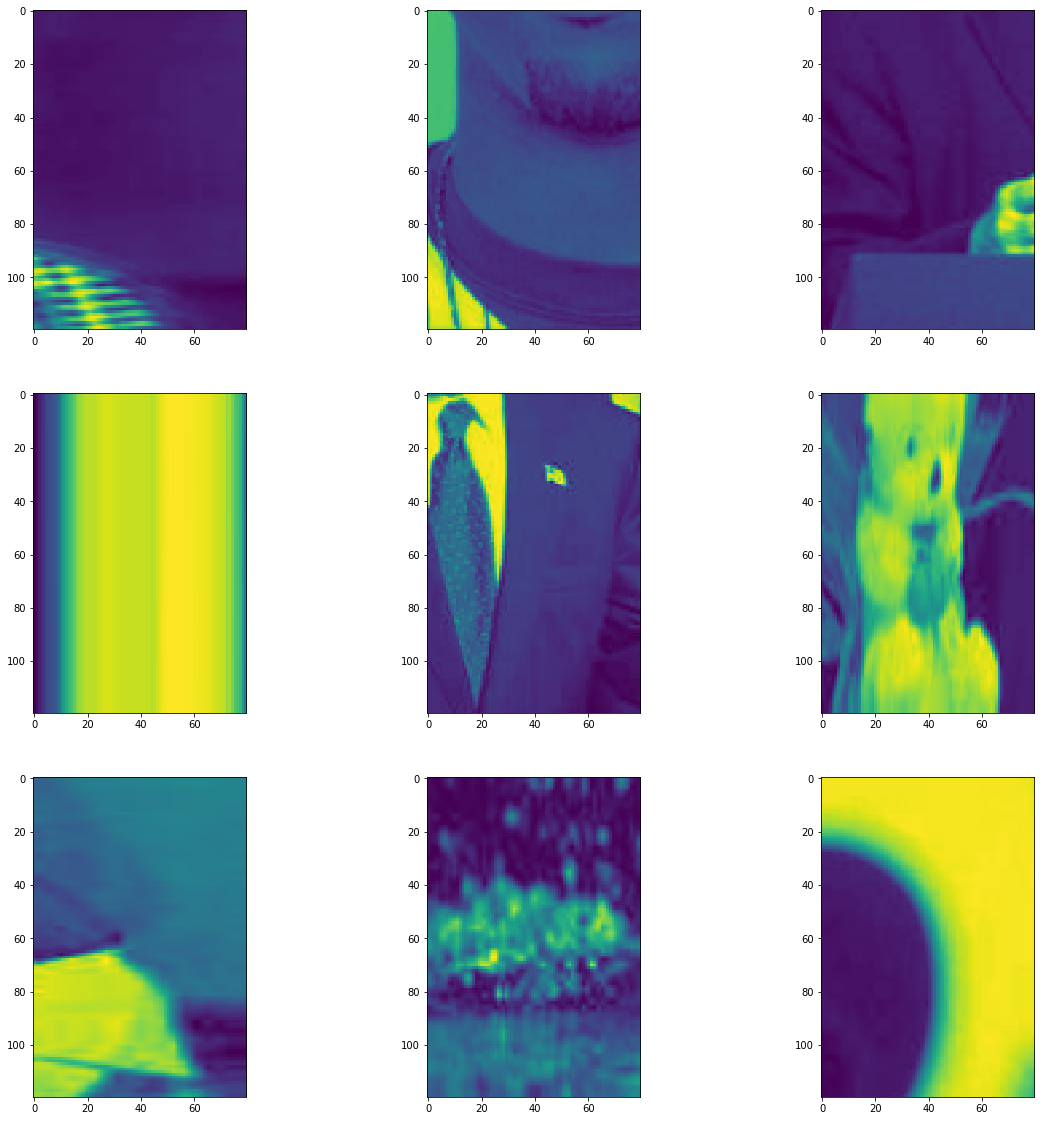

In [80]:
img_plot.plot_images_in_square(data_validation_neg, 3, 20)